<a href="https://colab.research.google.com/github/KORALLLL/summer_practice/blob/main/projects/regression_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Нейронная сеть, решающая задачу регрессии

Таргетная функция:

$$
y(x) = 2^x sin(2^{-x})
$$

Функция потерь:

$$
MAE = \frac{1}{l} \sum^l_{i=1} |y_{i pred} - y_{i target}|
$$

## Importation modules and creation a graph

In [9]:
import torch
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [13.0, 5.0]

## training dataset

In [25]:
def target_function(x):
  return (2 ** x) * torch.sin(2 ** (-x))

Text(0, 0.5, 'y')

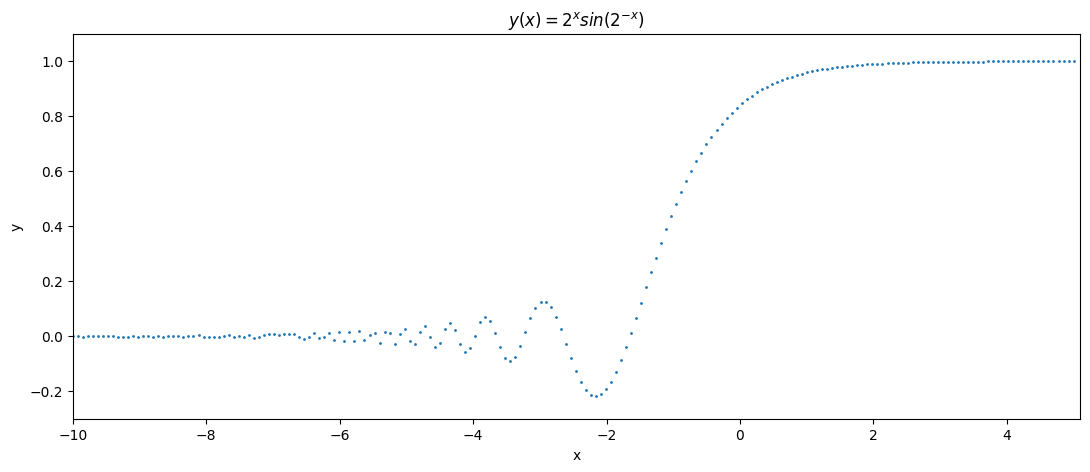

In [58]:
x_train = torch.linspace(-10, 5, 200)
y_train = target_function(x_train)
plt.plot(x_train.numpy(), y_train.numpy(), 'o', markersize = 1)
plt.title('$y(x) = 2^x sin(2^{-x})$')
plt.axis([-10, 5.1, -0.3, 1.1])
plt.xlabel('x')
plt.ylabel('y')

## Adding noise

Text(0, 0.5, 'y')

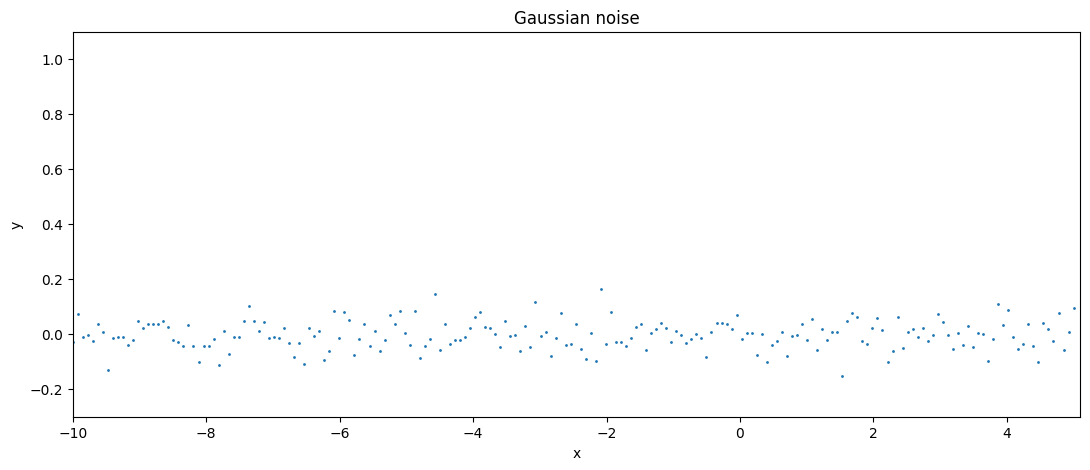

In [59]:
noise = torch.randn(y_train.shape) / 20
plt.plot(x_train.numpy(), noise, 'o', markersize = 1)
plt.title('Gaussian noise')
plt.axis([-10, 5.1, -0.3, 1.1])
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y_train')

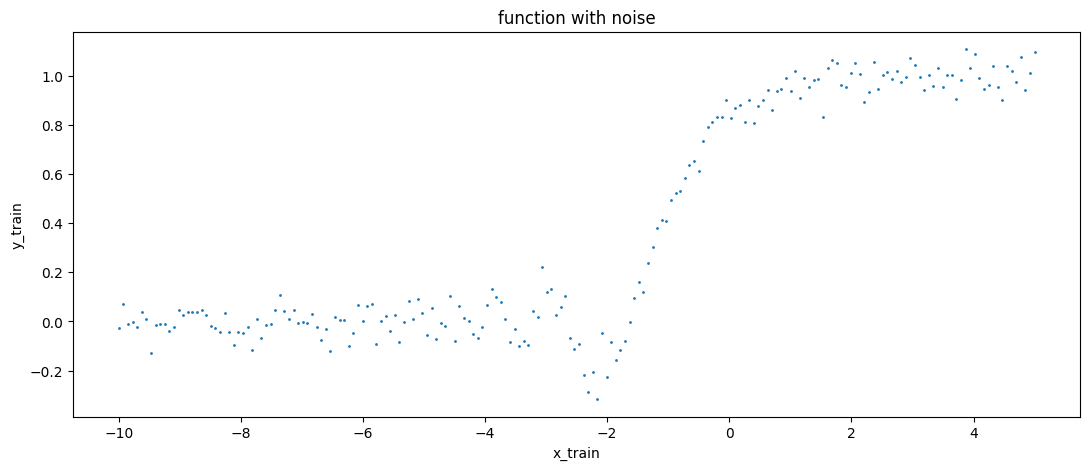

In [60]:
y_train += noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o', markersize = 1)
plt.title('function with noise')
plt.xlabel('x_train')
plt.ylabel('y_train')

In [61]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

tensor([[-2.8210e-02],
        [ 7.1017e-02],
        [-1.1088e-02],
        [-3.6113e-03],
        [-2.2206e-02],
        [ 3.8248e-02],
        [ 1.0749e-02],
        [-1.2968e-01],
        [-1.3134e-02],
        [-1.2285e-02],
        [-1.0567e-02],
        [-4.0783e-02],
        [-2.1947e-02],
        [ 4.5990e-02],
        [ 2.4977e-02],
        [ 3.8819e-02],
        [ 3.7188e-02],
        [ 3.7284e-02],
        [ 4.6495e-02],
        [ 2.7250e-02],
        [-1.8880e-02],
        [-2.5260e-02],
        [-4.4675e-02],
        [ 3.5349e-02],
        [-4.3199e-02],
        [-9.6440e-02],
        [-4.4242e-02],
        [-4.5762e-02],
        [-2.1443e-02],
        [-1.1588e-01],
        [ 1.0798e-02],
        [-6.7517e-02],
        [-1.2922e-02],
        [-9.1902e-03],
        [ 4.5789e-02],
        [ 1.0871e-01],
        [ 4.1148e-02],
        [ 8.7757e-03],
        [ 4.8249e-02],
        [-7.5986e-03],
        [-2.5656e-03],
        [-6.0490e-03],
        [ 3.1540e-02],
        [-2

## validation dataset

Text(0, 0.5, 'y_validation')

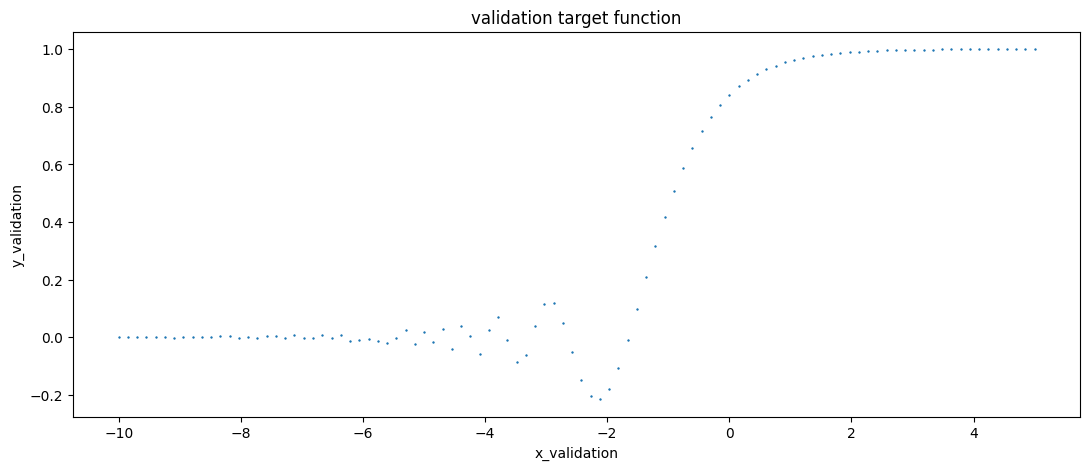

In [62]:
x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation.data)
plt.plot(x_validation, y_validation, '+', markersize=1)
plt.title('validation target function')
plt.xlabel('x_validation')
plt.ylabel('y_validation')

In [63]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

## Model construction

In [64]:
class Net(torch.nn.Module):
  def __init__(self, n_hidden_neurons = 20):
    super(Net, self).__init__()
    self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
    self.act1 = torch.nn.Tanh()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
    self.act2 = torch.nn.Tanh()
    self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    x = self.act2(x)
    x = self.fc3(x)
    return(x)

net = Net()

## Prediction

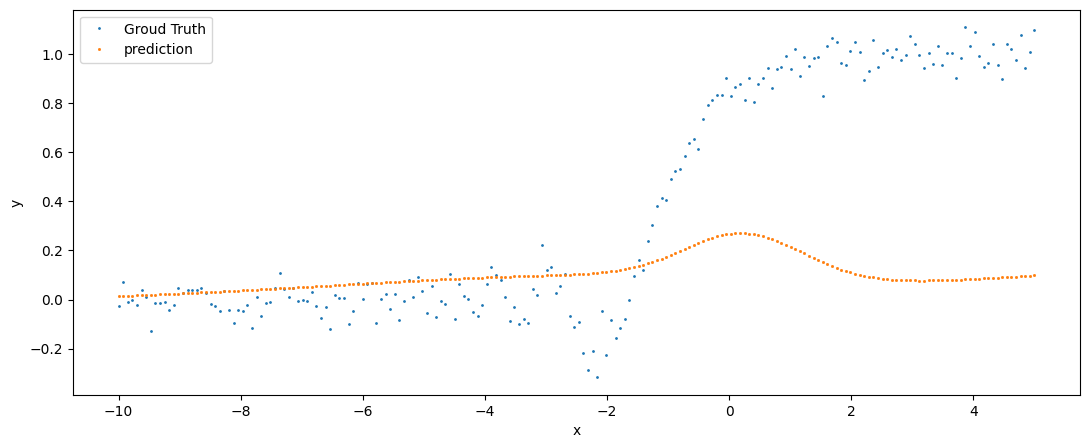

In [65]:
def predict(net, x, y):
  y_pred = net.forward(x)
  plt.plot(x.numpy(), y.numpy(), 'o', markersize = 1, label='Groud Truth')
  plt.plot(x.numpy(), y_pred.data.numpy(), 's', markersize = 1, label='prediction')
  plt.legend(loc = 'upper left')
  plt.xlabel('x')
  plt.ylabel('y')

predict(net, x_train, y_train)

## Optimizer

In [66]:
optimizer = torch.optim.Adam(net.parameters(), lr = 0.01)

## Loss function

In [67]:
def loss(pred, target):
  MAE = abs(pred - target)
  return MAE.mean()

## Training procedure

In [68]:
for epoch_index in range(2000):
  optimizer.zero_grad()

  y_pred = net.forward(x_train)

  loss_val = loss(y_pred, y_train)

  loss_val.backward()

  optimizer.step()


0.01816832460463047


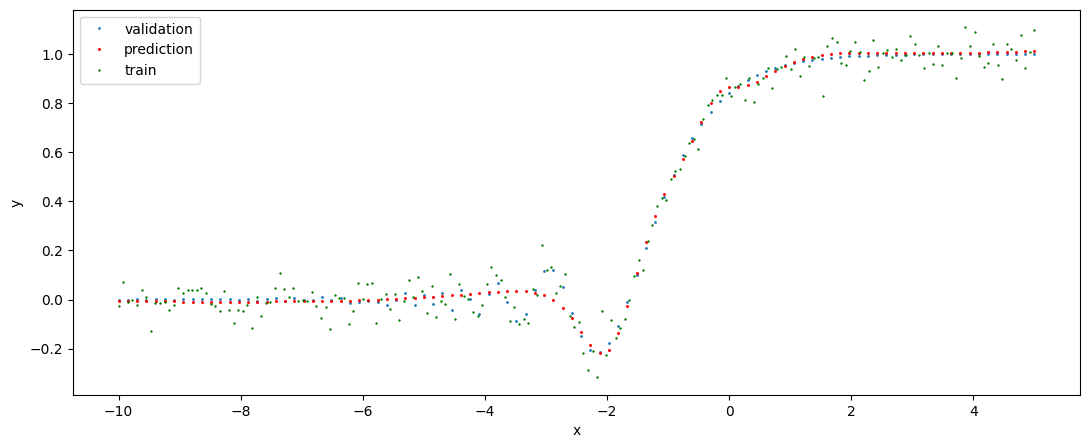

In [69]:
y_pred = net.forward(x_validation)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o', markersize = 1, label='validation')
plt.plot(x_validation.numpy(), y_pred.data.numpy(), 's', c='r', markersize = 1, label='prediction')
plt.plot(x_train.numpy(), y_train.numpy(), '+', c='g', markersize = 1, label = 'train')
plt.legend(loc = 'upper left')
plt.xlabel('x')
plt.ylabel('y')

def metric(pred, target):
  return (pred-target).abs().mean()
print(metric(net.forward(x_validation), y_validation).item())